# Numpy, Scipy and Matplotlib

## Importing Data from Text files
### Method 1 - Using Lists

In [1]:
f = open('data/rain_data.txt','r') # Create a file pointer with syntax as open(filename,access type)
contents = f.readlines()      # Reads contents of the file into a list
y = []
sec = []
rain = []
for line in contents:
    a, b, c = line.split()
    y.append(a)
    sec.append(b)
    rain.append(c)
f.close()

### Method 2 - Using Numpy Arrays

In [2]:
import numpy as np

f = open('data/rain_data.txt','r')
contents = f.readlines()
l = len(contents)
y = np.zeros(l,dtype=np.int16)
sec = np.zeros(l)
rain = np.zeros(l)

i = 0
for line in contents:
    y[i], sec[i], rain[i] = line.split()
    i += 1
print sec
print sec.shape
print np.shape(sec)

[   1.0019    1.0089    1.0158 ...,  220.4157  220.4227    1.0784]
(30597,)
(30597,)


## Exercise 3
---

Write a program to find the first 12 Fibonacci numbers. In a Fibonacci series/sequence, if $F_n$ is the $n^{th}$ term of the series, (provided $n \ge 2$) then it can be given in terms of the previous 2 terms, $F_{n-1}$ and $F_{n-2}$ by the recurrence relation,
$$ F_n = F_{n-1} + F_{n-2}$$
Find all the values till 12th term ($F_{12}$), save them and print them using loops. Take $F_0$ = 0 and $F_1$ = 1. **Use numpy arrays. Set the data type to be int8. Do you notice anything strange? Set the data type to be int16 and repeat. Do you notice anything strange?** If yes/no, can you guess what could be the reason?

## Exercise 4
---

Assuming Surface Temperature, $T_s = 30^\circ C$ and Surface Pressure, $P_s = 10^5 Pa$ and given following data:

||||||||||||||||
|------------------------------------------------------------------------------------------|
| Z (Altitude in km)|0.00|0.10|0.30|0.50|1.00|2.00|3.00|4.00|5.00|6.00|7.00|8.00|9.00|10.0 |
|RH (Relative Humidity in %)|60.0|70.0|80.0|75.0|60.0|50.0|80.0|90.0|60.0|40.0|20.0|5.0|2.0|1.0|


- Calculate $e_s(Z)$ which is given by $A\exp{\left[\frac{-B}{T}\right]}$, where $A = 2.53 \times 10^{11} Pa$ and $B = 5420 K$
- Calculate $e(Z)$ which is given by $\frac{RH \times e_s}{100}$. (Don't divide RH by 100)
* Calculate T(z) which is given by $T = T_S - \frac{gZ}{C_p}$, where $g = 9.806\ m/s^2$ and $C_p = 1005\ J/kgK$
* Calculate P(z) which is given by $P = P_s\exp{\frac{-gZ}{RT}}$, where $R = 287\ J/kgK$
* Calculate $\rho$(z) which is given by $\rho = \frac{P}{RT}$
* Calculate q(z) which is given by $q = 0.622\left[\ \frac{e}{P} \right]$
* Calculate W(z), given by $W = q\times\ \rho$
* Calculate h(z), given by $h = Lq + C_pT$. Where $L = 2.5006\times\ 10^6\ J/kg$. (Use T in K here)
* Calculate MSE(z), given by $MSE = h + gZ$
* Calculate Velocity v(z), which is given by the relation, $v = v_0\left(\exp\left[\frac{Z}{Z_s}\right] - 1\right)$, where, $Z_s = \frac{RT_s}{g}$ (Where $T_s$ is in Kelvin) and $v_0 = 100\ m/s$
* Calculate the total energy, $E = MSE + 0.5v^2$

In [3]:
# %load ../codes/Ex2.py
"""
Created on Wed Jun 15 16:26:33 2016

@author: kushal

Program for Problem 4
"""

import numpy as np

z = np.array([0.00, 0.10, 0.30, 0.50, 1.00, 2.00, 3.00, 4.00, 5.00, 6.00, 7.00, 8.00, 9.00, 10.0])
rh = np.array([60.0, 70.0, 80.0, 75.0, 60.0, 50.0, 80.0, 90.0, 60.0, 40.0, 20.0, 5.0, 2.0, 1.0])

print 'Z (Altitude in km): ', z
print 'RH (Relative Humidity in %): ', rh

Ts = 30.
Ps = 1.e5
A = 2.53e11
B = 5420.
g = 9.806
Cp = 1005.
R = 287.
L = 2.5006e6
v0 = 100.

T = np.zeros(z.shape[0])
Tk = np.array(T)
es = np.array(T)
e = np.array(T)
P = np.array(T)
rho = np.array(T)
q = np.array(T)
W = np.array(T)
h = np.array(T)
mse = np.array(T)
v = np.array(T)
E = np.array(T)

Tk = (Ts+273.15) - ((g*z*1000)/Cp)
T = Tk - 273.15
es = A * np.exp(-B/Tk)
e = (rh/100.) * es
P = Ps * np.exp((-g*z*1000)/(R*Tk))
rho = P/(R*Tk)
q = 0.622 * (e/P)
W = q * rho
h = (L*q) + (Cp * Tk)
mse = h + (g*z*1000)
Zs = R * ((Ts + 273.15)/g)
v = v0 * (np.exp((z*1000/Zs)) - 1)
E = mse + 0.5 * (v**2)

Z (Altitude in km):  [  0.    0.1   0.3   0.5   1.    2.    3.    4.    5.    6.    7.    8.
   9.   10. ]
RH (Relative Humidity in %):  [ 60.  70.  80.  75.  60.  50.  80.  90.  60.  40.  20.   5.   2.   1.]


In [4]:
%matplotlib inline

## Plotting
---
We will use the Matplotlib module for plotting. More specifically, the pyplot module within matplotlib.

The matplotlib module is generally imported as 
``` python
import matplotlib.pyplot as plt                   # Easiest way to import matplotlib
from matplotlib import pyplot                     # Elaborate way and also, the full name has to be used
from matplotlib import pyplot as plt              # same as the first method but elaborate
```


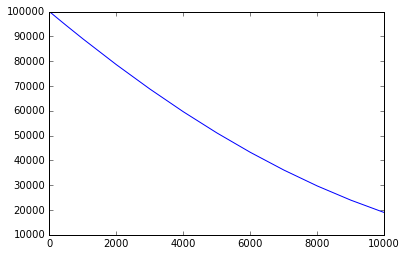

In [5]:
# Plot of Pressure vs Altitude

import matplotlib.pyplot as plt
plt.plot(z*1000,P, label='P')

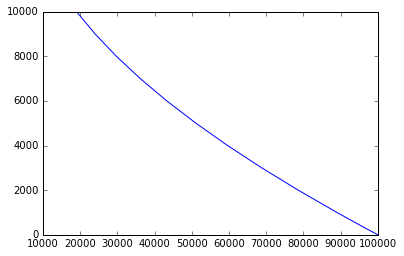

In [6]:
#Above plot is incorrect because altitude generally goes in the Y-Axis. So, Let's try again
plt.plot(P,z*1000,label='P')

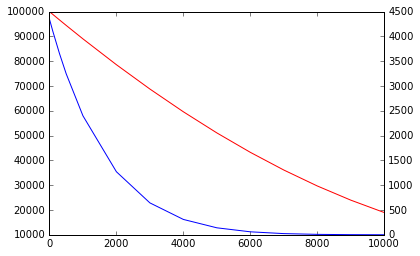

In [7]:
# Let's make a slightly advanced plot where we the X-Axis is common to two different plots
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(z*1000, P, 'r', label='P')
ax2.plot(z*1000, es, 'b', label='e_s')